[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/seap-udea/multimin/blob/master/examples/multimin_quickstart.ipynb)

<p align="left"><img src="https://raw.githubusercontent.com/seap-udea/multimin/master/docs/multimin-logo-white.webp" width="600" /></p>

# MultiMin: Quickstart

This notebook provides a quick introduction to the package

## Installation and importing

If you're running this in Google Colab or need to install the package, uncomment and run the following cell:

In [34]:
try:
    from google.colab import drive
    %pip install -Uq multimin
except ImportError:
    print("Not running in Colab, skipping installation")
    %load_ext autoreload
    %autoreload 2
!mkdir -p gallery/

# Uncomment to install from GitHub (development version)
# !pip install git+https://github.com/seap-udea/MultiMin.git

Not running in Colab, skipping installation
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import multimin as mn
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import numpy as np
np.random.seed(1)
deg = np.pi/180

import warnings
warnings.filterwarnings("ignore")


## Distribution basics

### Univariate normal distibution

The most simple gaussians are univariate normal distributions. Let's create a distribution combining two normal distributions:

In [36]:
CMND = mn.ComposedMultiVariateNormal(
    mus=[0.0, 2.5],
    Sigmas=[1.0, 0.25],
    weights=[0.5, 0.5]
)

Now we can plot a sample of the distribution:

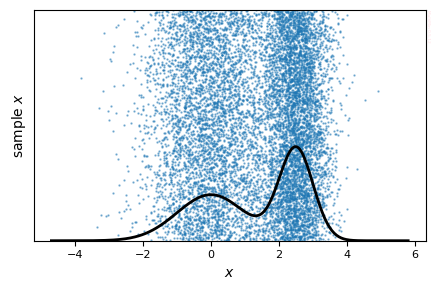

In [37]:
G = CMND.plot_sample(
    props=["x"],
    sargs=dict(s=0.5, alpha=0.5),
    figsize=3
)
plt.savefig('gallery/quickstart_univariate_sample_hist.png')

You can generate samples:

In [38]:
sample = CMND.rvs(5000)
sample[:10]

array([[ 1.2346658 ],
       [ 3.18819871],
       [-0.92121299],
       [-0.48274735],
       [-2.03678077],
       [ 2.14532057],
       [ 2.86172714],
       [-0.96293251],
       [ 0.31405467],
       [-1.99307374]])

Or calculate the pdf value:

In [39]:
CMND.pdf(1.3)

0.10807882631874657

### Multivariate distributions

The real power of `MultiMin` is to combinate multivariate normal distributions. For instante, below we compose two threevariated normal distributions:

In [40]:
weights = [0.5,0.5]
mus = [[1.0, 0.5, -0.5], [1.0, -0.5, +0.5],]
sigmas = [[1, 1.2, 2.3], [0.8, 0.2, 3.3]]
angles = [
    [10*deg, 30*deg, 20*deg],
    [-20*deg, 0*deg, 30*deg],
] 
Sigmas = mn.Stats.calc_covariance_from_rotation(sigmas, angles)
CMND = mn.ComposedMultiVariateNormal(mus=mus, weights=weights, Sigmas=Sigmas)

Let's preview the distribution

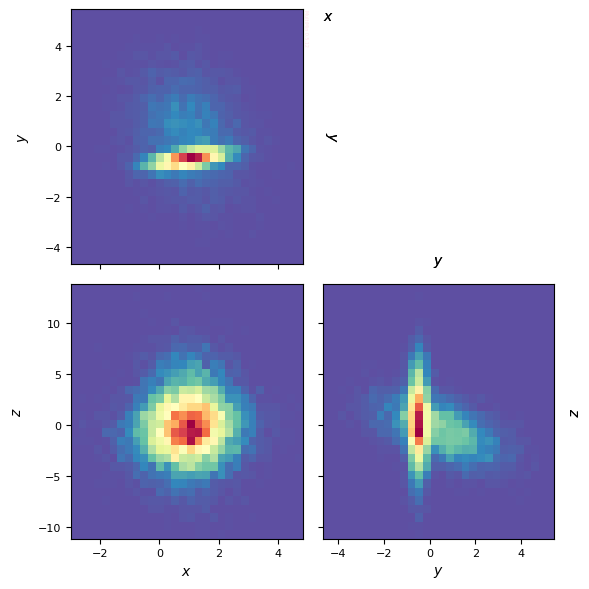

In [41]:
fig = CMND.plot_sample(
    figsize=3,
    props=["x", "y", "z"],
    hargs=dict(bins=30,cmap='Spectral_r', alpha=1)
)
plt.savefig('gallery/quickstart_3d_sample_density.png')

Another way to represent the distribution is using the so-called `DensityPlot`. For this purpose we need a sample:

In [42]:
sample = CMND.rvs(5000)

And then plot the sample:

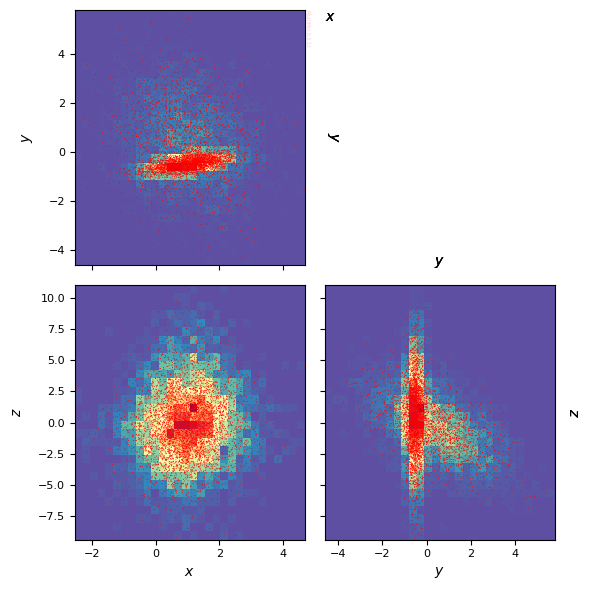

In [43]:
properties=dict(
    x=dict(label=r"$x$",range=None),
    y=dict(label=r"$y$",range=None),
    z=dict(label=r"$z$",range=None),
)

G=mn.DensityPlot(properties,figsize=3)
hargs=dict(bins=30,cmap='Spectral_r')
hist=G.plot_hist(sample,**hargs)

sargs=dict(s=0.5,edgecolor='None',color='r')
hist=G.scatter_plot(sample,**sargs)

plt.savefig('gallery/quickstart_data_density_scatter.png')


We can also show the distribution of data points in sample in 3D:

In [44]:

fig = go.Figure(
    data=go.Scatter3d(
        x=sample[:, 0],
        y=sample[:, 1],
        z=sample[:, 2],
        mode="markers",
        marker={
            "size": 2,
            "color": sample[:, 2],
            "colorscale": "Viridis",
            "showscale": False,
        },
    )
)

fig.update_layout(
    scene={
        "xaxis_title": properties["x"]["label"].replace("$", ""),
        "yaxis_title": properties["y"]["label"].replace("$", ""),
        "zaxis_title": properties["z"]["label"].replace("$", ""),
        "aspectmode": "cube",
    },
    showlegend=False,
)

fig.show()

`DensityPlot` can also be used in the case of univariate distributions:

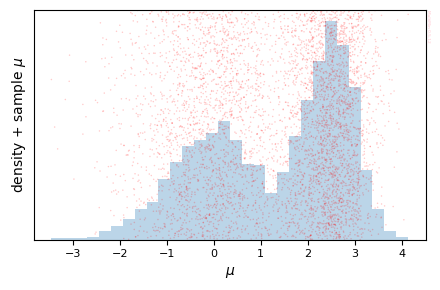

In [45]:
CMND = mn.ComposedMultiVariateNormal(
    mus=[0.0, 2.5],
    Sigmas=[1.0, 0.25],
    weights=[0.5, 0.5]
)

sample = CMND.rvs(5000)

properties=dict(
    x=dict(label=r"$\mu$",range=None),
)

G=mn.DensityPlot(properties,figsize=3)

G.plot_hist(
    sample,
    **dict(bins=30,cmap='Spectral_r', alpha=0.3),
)

sargs=dict(s=1.2,edgecolor='None',color='r')
G.scatter_plot(
    sample,
    **dict(s=1.2,edgecolor='None',color='r',alpha=0.2),
)
plt.savefig('gallery/quickstart_univariate_density_2gauss.png')

## Fittind data with CMND

### Univariate normals

The goal of `MultiMin` is to fit a CMND to a given dataset. Let's start with a univariate dataset. Although it may seem a trick, we will generate data using a CMND:

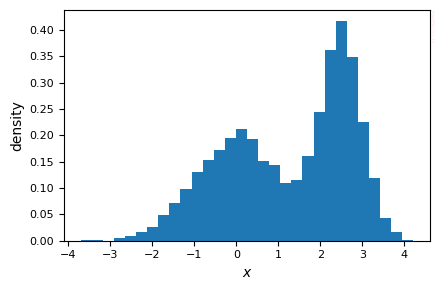

In [46]:
# Create the distribution
CMND = mn.ComposedMultiVariateNormal(
    mus=[0.0, 2.5],
    Sigmas=[1.0, 0.25],
    weights=[0.5, 0.5]
)

# Generate data
sample = CMND.rvs(10000)

# Plot the data
G = mn.DensityPlot(dict(x=dict(label=r"$x$",range=None)),figsize=3)
G.plot_hist(sample,**dict(bins=30))
plt.savefig('gallery/quickstart_univariate_histogram.png')

Let's fit it with a single Gaussian:

In [47]:
F = mn.FitCMND(ngauss=1, nvars=1)

Run the fitting procedure:

In [ ]:
F.fit_data(sample, advance=True)
# F.fit_data(sample)

Iterations:
Iter 0:
	Vars: [1.2, -1.8]
	LogL/N: 1.809451682705115
Iter 1:
	Vars: [1.2, -1.8]
	LogL/N: 1.809451615573238
Iter 2:
	Vars: [1.2, -1.8]
	LogL/N: 1.809451615573238


Let's plot the result of the fit:

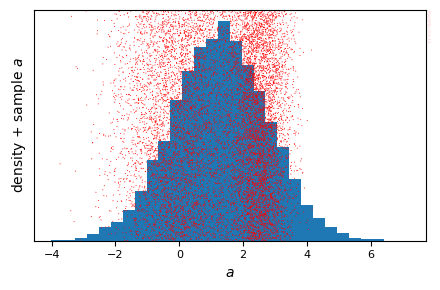

In [ ]:
F.plot_fit(
    hargs=dict(bins=30,cmap='Spectral_r'),
    sargs=dict(s=0.5,edgecolor='None',color='r'),
    figsize=3
)
plt.savefig('gallery/quickstart_univariate_fit_1gauss.png')

Naturally, the fit is not perfect. Now we can fit with two gaussians:

In [ ]:
F = mn.FitCMND(ngauss=2, nvars=1)
F.fit_data(sample)
F.plot_fit(
    hargs=dict(bins=30,cmap='Spectral_r'),
    sargs=dict(s=0.5,edgecolor='None',color='r'),
    figsize=3
)
plt.savefig('gallery/quickstart_univariate_fit_2gauss.png')

ValueError: Points X have 3 dimensions but this CMND has nvars=1

A visual inspection demonstrate that the fitted distribution (histogram), reproduces well the distribution of the sample points. However, a more precise comparison is required to judge the quality of the fit.

In [ ]:
CMND.tabulate('distance')

,w,mu_1,sigma_1
component,,,
1,0.5,0.0,1.0
2,0.5,2.5,0.5


In [ ]:
F.cmnd.tabulate('distance')

,w,mu_1,sigma_1
component,,,
2,0.494543,0.012172,0.997903
1,0.505457,2.505702,0.496447


Which confirme the result of the visual inspection.

### Multivariate data

We can repeat a similar set of test for the case of a multivariate data:

In [ ]:
weights = [0.5,0.5]
mus = [[1.0, 0.5, -0.5], [1.0, -0.5, +0.5],]
sigmas = [[1, 1.2, 2.3], [0.8, 0.2, 3.3]]
angles = [
    [10*deg, 30*deg, 20*deg],
    [-20*deg, 0*deg, 30*deg],
] 
Sigmas = mn.Stats.calc_covariance_from_rotation(sigmas, angles)

CMND = mn.ComposedMultiVariateNormal(mus=mus, weights=weights, Sigmas=Sigmas)

sample = CMND.rvs(5000)

We can fit with only one multivariate normal:

In [ ]:
F = mn.FitCMND(ngauss=1, nvars=3)
F.fit_data(data, advance=True)

Iterations:
Iter 0:
	Vars: [1.3, 0.25, 0.24, -2, -1.5, -0.58, 0.9, 0.85, 0.14]
	LogL/N: 5.721115267796224
Iter 1:
	Vars: [1.1, 0.062, 0.18, -2.1, -1.9, -0.89, 0.24, 0.3, 0.18]
	LogL/N: 5.485410168510942
Iter 2:
	Vars: [0.99, 0.0008, 0.062, -2.3, -2, -0.93, -0.27, 0.11, -0.55]
	LogL/N: 5.3323903021088555
Iter 3:
	Vars: [1, -0.013, 0.049, -2.3, -2, -0.92, -0.23, 0.11, -0.7]
	LogL/N: 5.328653467976455
Iter 4:
	Vars: [1, -0.011, 0.05, -2.3, -2, -0.92, -0.23, 0.11, -0.7]
	LogL/N: 5.328608846987231
Iter 5:
	Vars: [1, -0.011, 0.05, -2.3, -2, -0.92, -0.23, 0.11, -0.7]
	LogL/N: 5.328608846987231


Check the results:

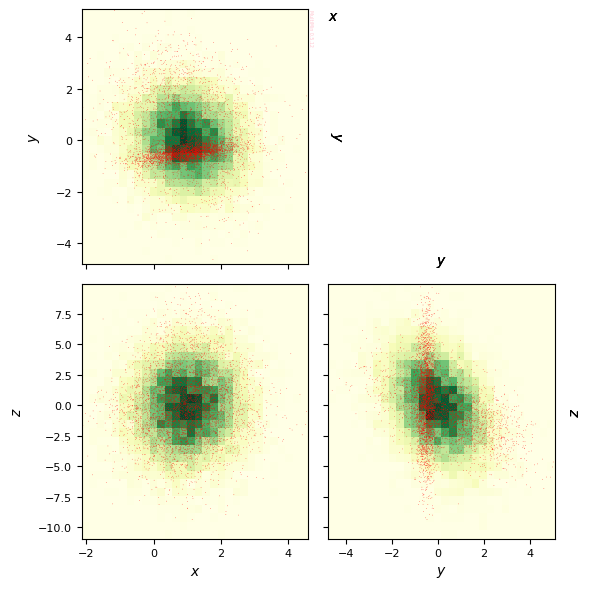

In [ ]:
G=F.plot_fit(
    props=["x","y","z"],
    hargs=dict(bins=30,cmap='YlGn'),
    sargs=dict(s=0.2,edgecolor='None',color='r'),
    figsize=3
)

plt.savefig('gallery/quickstart_fit_2gauss_3d.png')


Not good. Let's try with two gaussians:

Iterations:
Iter 0:
	Vars: [0, 0, 2.3, 1.8, -2.3, 0.97, -0.71, 1.6, -1.6, -1.4, -0.13, -2.2, -2.7, -0.73, 0.97, 0.49, -0.22, 1.3, 0.81, 0.31]
	LogL/N: 5.689994230603347
Iter 1:
	Vars: [-1.1, 0.0069, 1.1, 1.1, -1.1, 0.99, -0.48, 0.37, -1.8, -1.4, -1.4, -2.3, -3.5, -0.66, -0.36, -0.037, -1.3, 1.1, 0.22, 0.085]
	LogL/N: 5.028931535326813
Iter 2:
	Vars: [-0.49, 0.0065, 0.92, 0.85, -0.74, 1, -0.49, 0.56, -2.1, -1.7, -1.3, -2.5, -3.7, -0.73, -0.29, 0.13, -1.3, 1.1, 0.037, 0.05]
	LogL/N: 4.9096804445492035
Iter 3:
	Vars: [-0.19, 0.007, 0.94, 0.6, -0.57, 1, -0.5, 0.56, -2.1, -1.7, -1.3, -2.5, -3.7, -0.71, -0.37, 0.19, -1.3, 1.1, 0.017, 0.052]
	LogL/N: 4.894504534199155
Iter 4:
	Vars: [0.026, 0.0072, 0.99, 0.48, -0.47, 1, -0.5, 0.57, -2.1, -1.7, -1.3, -2.5, -3.7, -0.7, -0.42, 0.22, -1.2, 1.2, 0.02, 0.054]
	LogL/N: 4.891833977619959
Iter 5:
	Vars: [0.029, 0.0072, 0.99, 0.48, -0.47, 1, -0.5, 0.57, -2.1, -1.7, -1.3, -2.5, -3.7, -0.7, -0.42, 0.22, -1.2, 1.2, 0.024, 0.06]
	LogL/N: 4.891820537224648


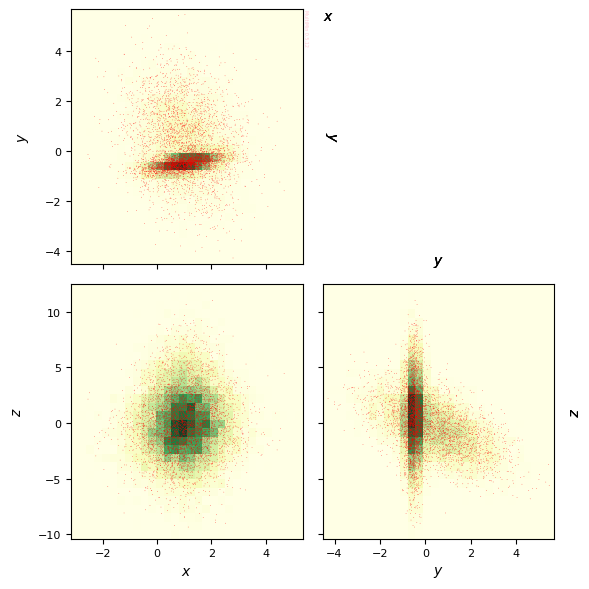

In [ ]:
F = mn.FitCMND(ngauss=2, nvars=3)
F.fit_data(data, advance=True)
G=F.plot_fit(
    props=["x","y","z"],
    hargs=dict(bins=30,cmap='YlGn'),
    sargs=dict(s=0.2,edgecolor='None',color='r'),
    figsize=3
)

plt.savefig('gallery/quickstart_fit_result_3d.png')


Much better!

Check the initial and final distributions:

For comparison, let's see the centers of the CMNDs, the original and the fitted one:

In [ ]:
CMND.tabulate('distance')

,w,mu_1,mu_2,mu_3,sigma_1,sigma_2,sigma_3,rho_12,rho_13,rho_23
component,,,,,,,,,,
1,0.5,1.0,0.5,-0.5,1.064392,1.510773,2.077169,-0.211137,0.101191,-0.534075
2,0.5,1.0,-0.5,0.5,0.788611,0.241023,3.300000,0.539822,0.000000,0.000000


In [ ]:
F.cmnd.tabulate('distance')

,w,mu_1,mu_2,mu_3,sigma_1,sigma_2,sigma_3,rho_12,rho_13,rho_23
component,,,,,,,,,,
1,0.502661,0.990894,0.476496,-0.468879,1.069554,1.507282,2.131260,-0.207239,0.107995,-0.551781
2,0.497339,1.006772,-0.503770,0.573791,0.755699,0.234941,3.326584,0.520709,0.011993,0.030131


The coincidence is expected

---

**MultiMin** - Multivariate Gaussian fitting

© 2026 Jorge I. Zuluaga